Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import os
import cv2
from scipy.fftpack import dct, idct

Dataset Loading and preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

#load Image
def load_images_from_folder(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
        if image is not None:
            image = cv2.resize(image, img_size) 
            images.append(image)
            labels.append(label)
    return images, labels

adenocarcinoma_folder = r"F:\university\visual\lungcancerdataset\adenocarcinoma"
benign_folder = r"F:\university\visual\lungcancerdataset\benign"

# Load images and labels
adenocarcinoma_images, adenocarcinoma_labels = load_images_from_folder(adenocarcinoma_folder, label=1)  # Label 1 for adenocarcinoma
benign_images, benign_labels = load_images_from_folder(benign_folder, label=0)  # Label 0 for benign

# Combine images and labels
images = np.array(adenocarcinoma_images + benign_images)
labels = np.array(adenocarcinoma_labels + benign_labels)

# Normalize  images
images = images / 255.0
images = images.reshape((-1, 128, 128, 1))
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)


Printing The Shape of Dataset

In [3]:
print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

Training images shape: (8000, 128, 128, 1)
Training labels shape: (8000,)
Testing images shape: (2000, 128, 128, 1)
Testing labels shape: (2000,)
Training set class distribution: [4000 4000]
Testing set class distribution: [1000 1000]


Building CNN Model

In [7]:
pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.2 MB 1.1 MB/s eta 0:03:02
   ---------------------------------------- 0.8/204.2 MB 1.2 MB/s eta 0:02:56
   ---------------------------------------- 1.0/204.2 MB 1.1 MB/s eta 0:03:02
   ---------------------------------------- 1.3/204.2 MB 1.1 MB/s eta 0:03:02
   ---------------------------------------- 1.6/204.2 MB 1.2 MB/s eta 0:02:49
   ---------------------------------------- 1.6/204.2 MB 1.2 MB/s eta 0:02:49
   ---------------------------------------- 1.8/204.2 MB 1.0 MB/s eta 0:03:13
   ---------------------------------------- 1.8/204.2 MB 1.0 MB/s eta 0:03:13
   ---------------------------------------- 2.1/204.2 MB 876.7 kB/s eta 0:03:51
   ---------------------------------------- 2.1/204.2 MB 876.7 kB/s eta 0:03:51
   

In [10]:
!pip install torchsummary


Model Training

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 126, 126]             320
            Conv2d-2         [-1, 32, 126, 126]             320
              ReLU-3         [-1, 32, 126, 126]               0
         MaxPool2d-4           [-1, 32, 63, 63]               0
         MaxPool2d-5           [-1, 32, 63, 63]               0
           Dropout-6           [-1, 32, 63, 63]               0
           Dropout-7           [-1, 32, 63, 63]               0
            Conv2d-8           [-1, 64, 61, 61]          18,496
            Conv2d-9           [-1, 64, 61, 61]          18,496
             ReLU-10           [-1, 64, 61, 61]               0
        MaxPool2d-11           [-1, 64, 30, 30]               0
        MaxPool2d-12           [-1, 64, 30, 30]               0
          Dropout-13           [-1, 64, 30, 30]               0
          Dropout-14           [-1, 64,

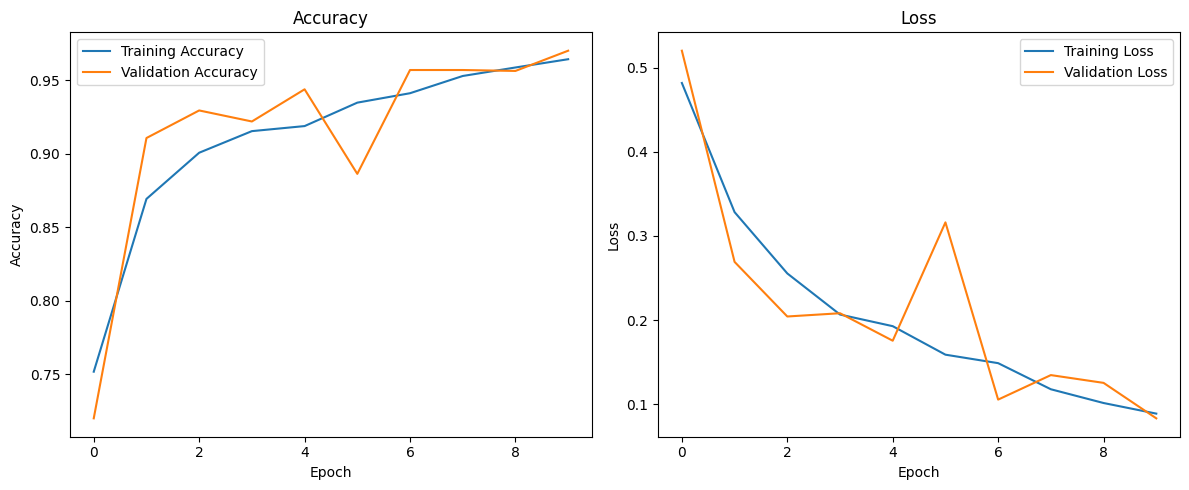

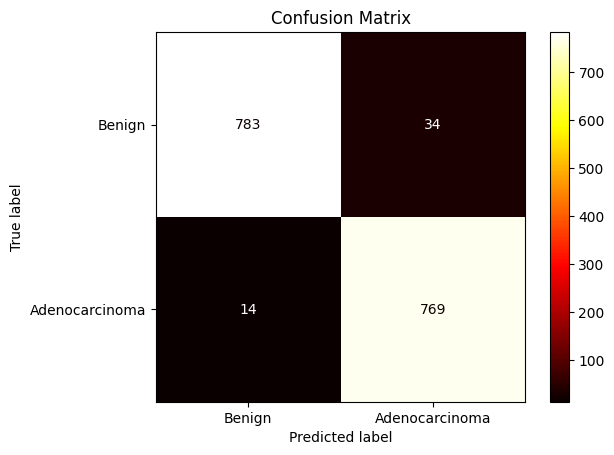

Fold 2/5
Epoch 1 - Train Acc: 0.7842, Val Acc: 0.8000, Train Loss: 0.4290, Val Loss: 0.4226
Epoch 2 - Train Acc: 0.8816, Val Acc: 0.9100, Train Loss: 0.3041, Val Loss: 0.2835
Epoch 3 - Train Acc: 0.8973, Val Acc: 0.8931, Train Loss: 0.2641, Val Loss: 0.3479
Epoch 4 - Train Acc: 0.9225, Val Acc: 0.9269, Train Loss: 0.2101, Val Loss: 0.1808
Epoch 5 - Train Acc: 0.9239, Val Acc: 0.9319, Train Loss: 0.1850, Val Loss: 0.1575
Epoch 6 - Train Acc: 0.9472, Val Acc: 0.8688, Train Loss: 0.1311, Val Loss: 0.3411
Epoch 7 - Train Acc: 0.9578, Val Acc: 0.9481, Train Loss: 0.1096, Val Loss: 0.1321
Epoch 8 - Train Acc: 0.9623, Val Acc: 0.9287, Train Loss: 0.1002, Val Loss: 0.1733
Epoch 9 - Train Acc: 0.9702, Val Acc: 0.9625, Train Loss: 0.0796, Val Loss: 0.1029
Epoch 10 - Train Acc: 0.9781, Val Acc: 0.9269, Train Loss: 0.0600, Val Loss: 0.2140
Fold 2 - Accuracy: 0.9269, F1 Score: 0.9319


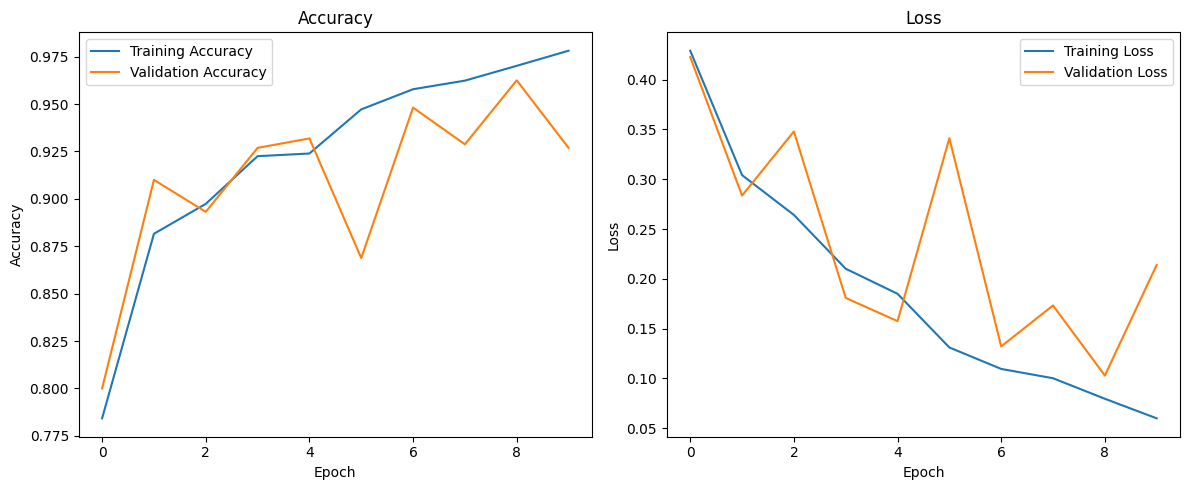

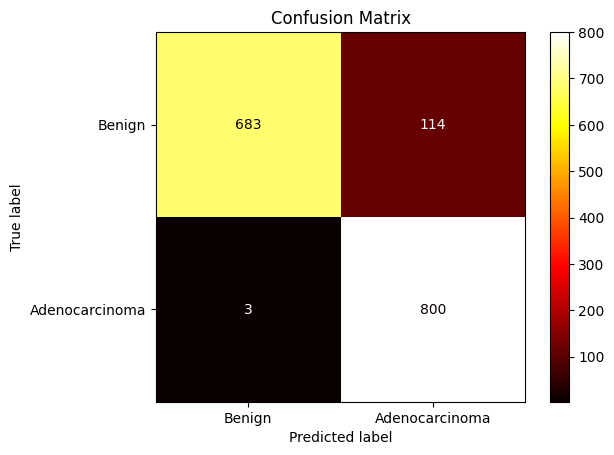

Fold 3/5
Epoch 1 - Train Acc: 0.7291, Val Acc: 0.8806, Train Loss: 0.4793, Val Loss: 0.3272
Epoch 2 - Train Acc: 0.8942, Val Acc: 0.8950, Train Loss: 0.2738, Val Loss: 0.2929
Epoch 3 - Train Acc: 0.9078, Val Acc: 0.9100, Train Loss: 0.2460, Val Loss: 0.2543
Epoch 4 - Train Acc: 0.9173, Val Acc: 0.9319, Train Loss: 0.2138, Val Loss: 0.1955
Epoch 5 - Train Acc: 0.9275, Val Acc: 0.9169, Train Loss: 0.1845, Val Loss: 0.2072
Epoch 6 - Train Acc: 0.9419, Val Acc: 0.9181, Train Loss: 0.1397, Val Loss: 0.2271
Epoch 7 - Train Acc: 0.9469, Val Acc: 0.9450, Train Loss: 0.1362, Val Loss: 0.1380
Epoch 8 - Train Acc: 0.9537, Val Acc: 0.9606, Train Loss: 0.1135, Val Loss: 0.1002
Epoch 9 - Train Acc: 0.9620, Val Acc: 0.9719, Train Loss: 0.0960, Val Loss: 0.0723
Epoch 10 - Train Acc: 0.9703, Val Acc: 0.9712, Train Loss: 0.0858, Val Loss: 0.0809
Fold 3 - Accuracy: 0.9712, F1 Score: 0.9722


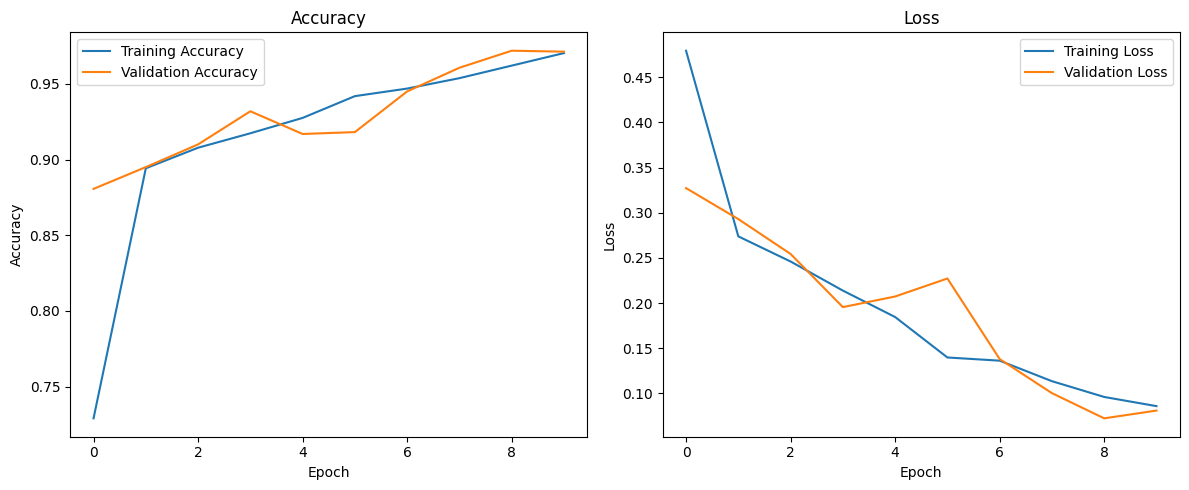

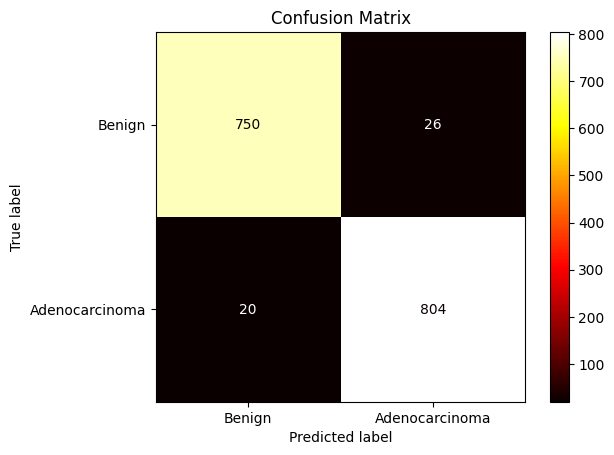

Fold 4/5
Epoch 1 - Train Acc: 0.7866, Val Acc: 0.7125, Train Loss: 0.4358, Val Loss: 0.5593
Epoch 2 - Train Acc: 0.8866, Val Acc: 0.9244, Train Loss: 0.2903, Val Loss: 0.2663
Epoch 3 - Train Acc: 0.9103, Val Acc: 0.8906, Train Loss: 0.2330, Val Loss: 0.2778
Epoch 4 - Train Acc: 0.9270, Val Acc: 0.9569, Train Loss: 0.1863, Val Loss: 0.1297
Epoch 5 - Train Acc: 0.9475, Val Acc: 0.9719, Train Loss: 0.1344, Val Loss: 0.0903
Epoch 6 - Train Acc: 0.9614, Val Acc: 0.9762, Train Loss: 0.1016, Val Loss: 0.0778
Epoch 7 - Train Acc: 0.9602, Val Acc: 0.9613, Train Loss: 0.1044, Val Loss: 0.1276
Epoch 8 - Train Acc: 0.9686, Val Acc: 0.9819, Train Loss: 0.0817, Val Loss: 0.0595
Epoch 9 - Train Acc: 0.9764, Val Acc: 0.9825, Train Loss: 0.0632, Val Loss: 0.0514
Epoch 10 - Train Acc: 0.9789, Val Acc: 0.9800, Train Loss: 0.0568, Val Loss: 0.0590
Fold 4 - Accuracy: 0.9800, F1 Score: 0.9795


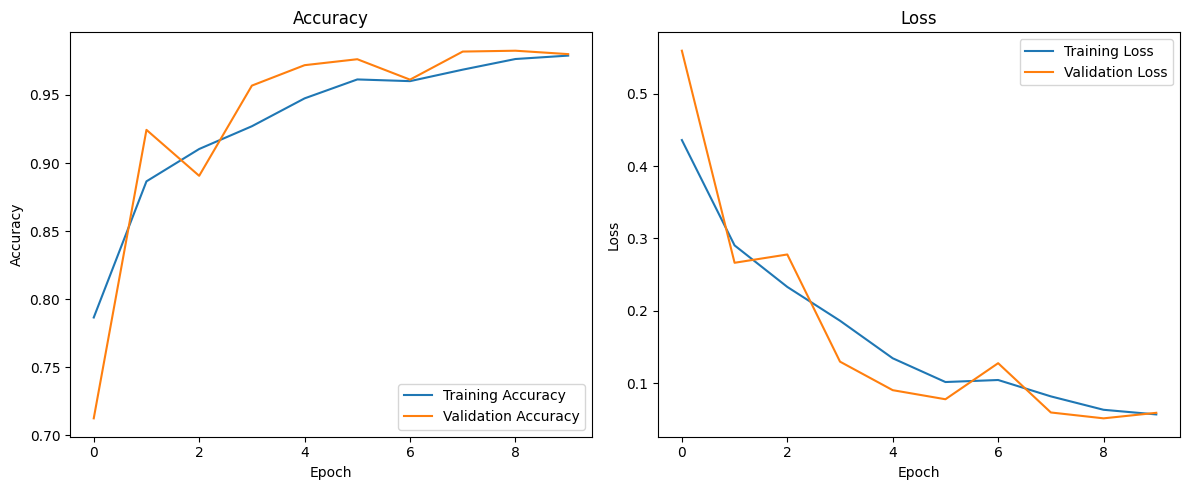

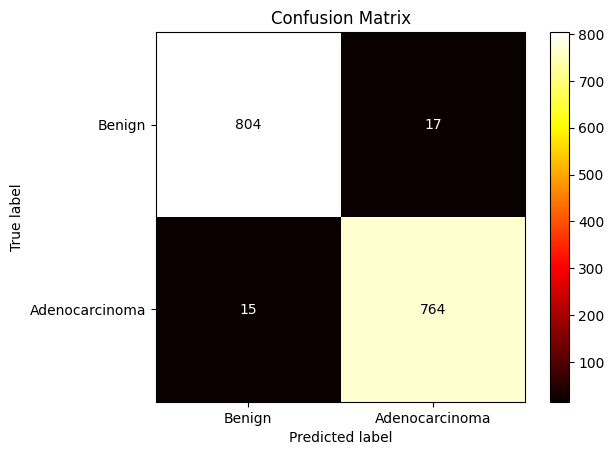

Fold 5/5
Epoch 1 - Train Acc: 0.7889, Val Acc: 0.8738, Train Loss: 0.4348, Val Loss: 0.3178
Epoch 2 - Train Acc: 0.8812, Val Acc: 0.8994, Train Loss: 0.3044, Val Loss: 0.2755
Epoch 3 - Train Acc: 0.8984, Val Acc: 0.9181, Train Loss: 0.2598, Val Loss: 0.2398
Epoch 4 - Train Acc: 0.9222, Val Acc: 0.8881, Train Loss: 0.2046, Val Loss: 0.2797
Epoch 5 - Train Acc: 0.9325, Val Acc: 0.9481, Train Loss: 0.1653, Val Loss: 0.1432
Epoch 6 - Train Acc: 0.9430, Val Acc: 0.9469, Train Loss: 0.1412, Val Loss: 0.1301
Epoch 7 - Train Acc: 0.9606, Val Acc: 0.9675, Train Loss: 0.1088, Val Loss: 0.0823
Epoch 8 - Train Acc: 0.9700, Val Acc: 0.9656, Train Loss: 0.0847, Val Loss: 0.0964
Epoch 9 - Train Acc: 0.9614, Val Acc: 0.9481, Train Loss: 0.0949, Val Loss: 0.1125
Epoch 10 - Train Acc: 0.9747, Val Acc: 0.9406, Train Loss: 0.0710, Val Loss: 0.1334
Fold 5 - Accuracy: 0.9406, F1 Score: 0.9379


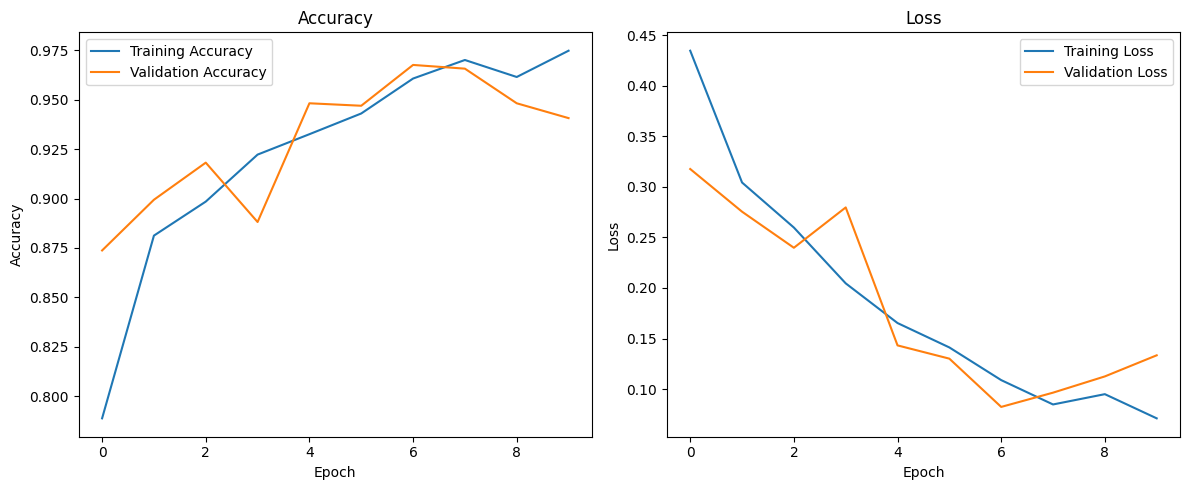

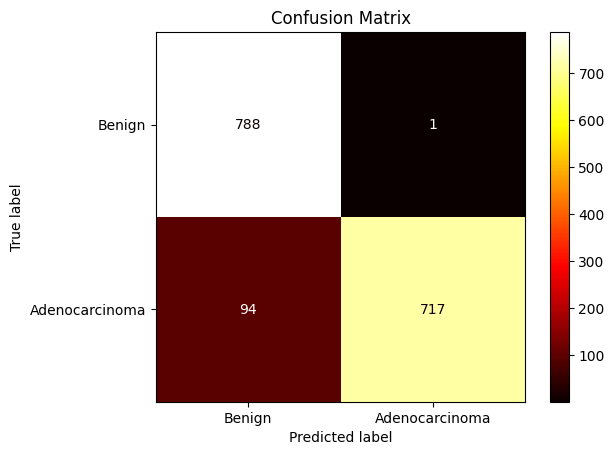

Mean Accuracy: 0.9578, Mean F1 Score: 0.9582


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torchsummary import summary

# CNN Model Creation


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Conv Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  
        self.pool1 = nn.MaxPool2d(2)                 
        self.drop1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  
        self.pool2 = nn.MaxPool2d(2)                  
        self.drop2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)  
        self.pool3 = nn.MaxPool2d(2)                    
        self.drop3 = nn.Dropout(0.25)

        # calculate flattened size
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1, nn.ReLU(), self.pool1, self.drop1,
            self.conv2, nn.ReLU(), self.pool2, self.drop2,
            self.conv3, nn.ReLU(), self.pool3, self.drop3
        )
        self._get_flattened_size()

        # FC Layers
        self.fc1 = nn.Linear(self._to_linear, 128)
        self.drop_fc = nn.Dropout(0.5)
        self.out = nn.Linear(128, 1)

    def _get_flattened_size(self):
        with torch.no_grad():
            sample = torch.zeros(1, 1, 128, 128)
            out = self.convs(sample)
            self._to_linear = out.view(1, -1).shape[1]

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.drop_fc(x)
        return torch.sigmoid(self.out(x))

model = CNNModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
summary(model, input_size=(1, 128, 128))


# Plotting functions
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.hot)
    plt.title("Confusion Matrix")
    plt.show()

def plot_metrics(train_acc, val_acc, train_loss, val_loss):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Prepare data 
X_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# Cross-validation
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
f1_scores = []


for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor)):
    print(f"Fold {fold + 1}/{k}")
    model = CNNModel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()

    X_train_fold, y_train_fold = X_tensor[train_idx], y_tensor[train_idx]
    X_val_fold, y_val_fold = X_tensor[val_idx], y_tensor[val_idx]

    train_loader = DataLoader(TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val_fold, y_val_fold), batch_size=32)

    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0

    train_acc_list, val_acc_list = [], []
    train_loss_list, val_loss_list = [], []

    for epoch in range(10):
        model.train()
        train_loss, correct, total = 0, 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)
            preds = (outputs > 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

        train_loss /= total
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss, correct, total = 0, 0, 0
        y_preds, y_trues = [], []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                preds = (outputs > 0.5).float()
                correct += (preds == y_batch).sum().item()
                total += y_batch.size(0)
                y_preds.extend(preds.cpu().numpy())
                y_trues.extend(y_batch.cpu().numpy())

        val_loss /= total
        val_acc = correct / total

        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    # Load best model and evaluate
    model.load_state_dict(best_model)
    y_preds_bin = np.array(y_preds).astype(int)
    y_trues_bin = np.array(y_trues).astype(int)

    acc = accuracy_score(y_trues_bin, y_preds_bin)
    f1 = f1_score(y_trues_bin, y_preds_bin)
    print(f"Fold {fold+1} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    
    accuracies.append(acc)
    f1_scores.append(f1)
    
    plot_metrics(train_acc_list, val_acc_list, train_loss_list, val_loss_list)
    plot_confusion_matrix(y_trues_bin, y_preds_bin, class_names=['Benign', 'Adenocarcinoma'])

print(f"Mean Accuracy: {np.mean(accuracies):.4f}, Mean F1 Score: {np.mean(f1_scores):.4f}")

Saving Trained CNN model

In [16]:
torch.save(model.state_dict(), 'cnn_model_best.pth')

Filter Extraction

Filters shape: torch.Size([32, 1, 3, 3])


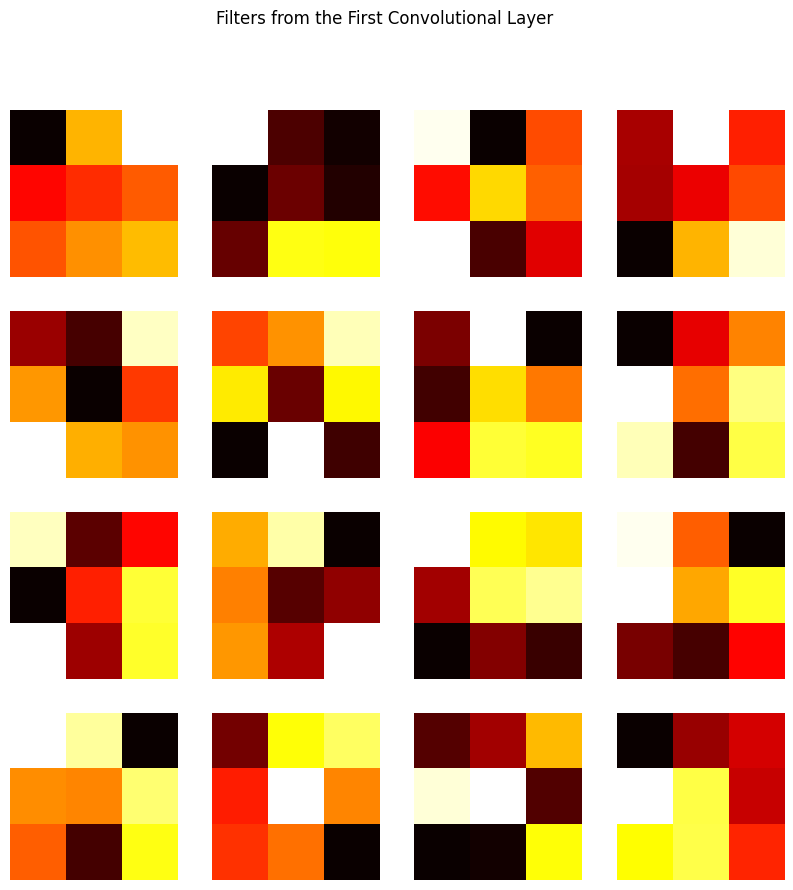

In [22]:
def visualize_filters(model):
    first_layer = model.conv1
    filters = first_layer.weight.data 
    print(f"Filters shape: {filters.shape}") 
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    plt.figure(figsize=(10, 10))
    n_filters = min(16, filters.shape[0])
    for i in range(n_filters):
        plt.subplot(4, 4, i + 1)
        plt.imshow(filters[i, 0, :, :], cmap='hot') 
        plt.axis('off')
    plt.suptitle('Filters from the First Convolutional Layer')
    plt.show()
model = CNNModel()
visualize_filters(model)

ScatNet Model Creation and Training


Fold 1/5
Epoch 1 - Train Acc: 0.6987, Val Acc: 0.7531, Train Loss: 0.5730, Val Loss: 0.5163
Epoch 2 - Train Acc: 0.7417, Val Acc: 0.7887, Train Loss: 0.5119, Val Loss: 0.4923
Epoch 3 - Train Acc: 0.7639, Val Acc: 0.7731, Train Loss: 0.4883, Val Loss: 0.4541
Epoch 4 - Train Acc: 0.7716, Val Acc: 0.8044, Train Loss: 0.4678, Val Loss: 0.4416
Epoch 5 - Train Acc: 0.7816, Val Acc: 0.8113, Train Loss: 0.4557, Val Loss: 0.4150
Epoch 6 - Train Acc: 0.7956, Val Acc: 0.8044, Train Loss: 0.4365, Val Loss: 0.3983
Epoch 7 - Train Acc: 0.8181, Val Acc: 0.8150, Train Loss: 0.4010, Val Loss: 0.3818
Epoch 8 - Train Acc: 0.8187, Val Acc: 0.8438, Train Loss: 0.3996, Val Loss: 0.3647
Epoch 9 - Train Acc: 0.8272, Val Acc: 0.8519, Train Loss: 0.3776, Val Loss: 0.3568
Epoch 10 - Train Acc: 0.8266, Val Acc: 0.8575, Train Loss: 0.3704, Val Loss: 0.3233
Fold 1 Results - Accuracy: 0.8575, F1 Score: 0.8594


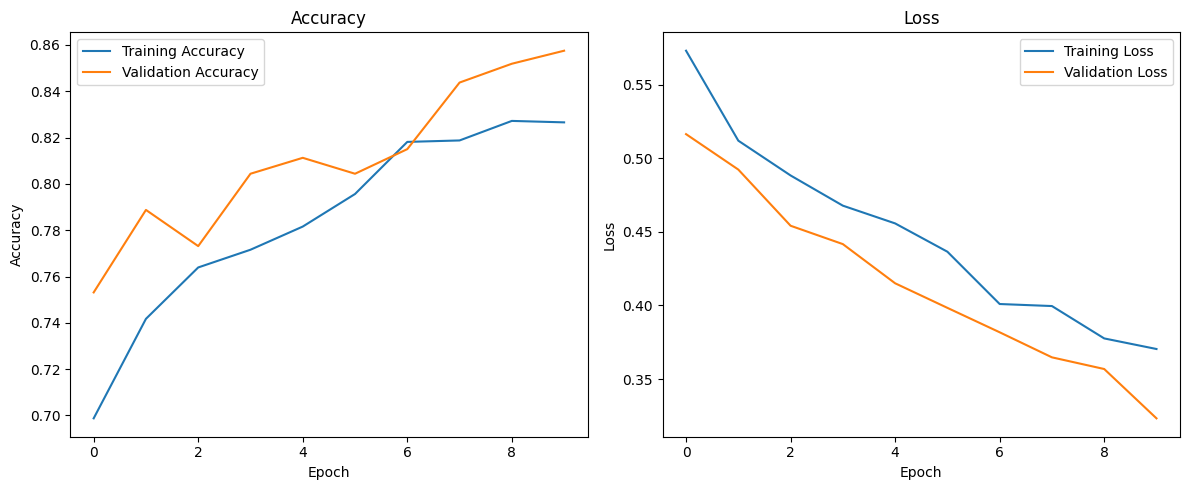

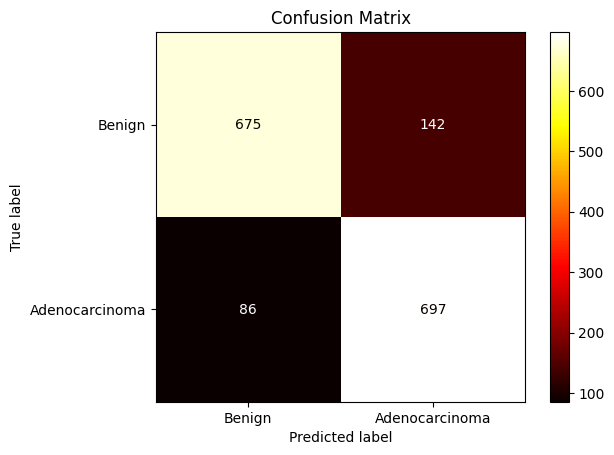


Fold 2/5
Epoch 1 - Train Acc: 0.6845, Val Acc: 0.7269, Train Loss: 0.5828, Val Loss: 0.5322
Epoch 2 - Train Acc: 0.7348, Val Acc: 0.7225, Train Loss: 0.5249, Val Loss: 0.5323
Epoch 3 - Train Acc: 0.7561, Val Acc: 0.7525, Train Loss: 0.5001, Val Loss: 0.4805
Epoch 4 - Train Acc: 0.7764, Val Acc: 0.8050, Train Loss: 0.4626, Val Loss: 0.4235
Epoch 5 - Train Acc: 0.7808, Val Acc: 0.8131, Train Loss: 0.4574, Val Loss: 0.4189
Epoch 6 - Train Acc: 0.7956, Val Acc: 0.7913, Train Loss: 0.4367, Val Loss: 0.4677
Epoch 7 - Train Acc: 0.8117, Val Acc: 0.8419, Train Loss: 0.4120, Val Loss: 0.3838
Epoch 8 - Train Acc: 0.8150, Val Acc: 0.8387, Train Loss: 0.4028, Val Loss: 0.3565
Epoch 9 - Train Acc: 0.8319, Val Acc: 0.8550, Train Loss: 0.3663, Val Loss: 0.3598
Epoch 10 - Train Acc: 0.8311, Val Acc: 0.8512, Train Loss: 0.3621, Val Loss: 0.3454
Fold 2 Results - Accuracy: 0.8512, F1 Score: 0.8383


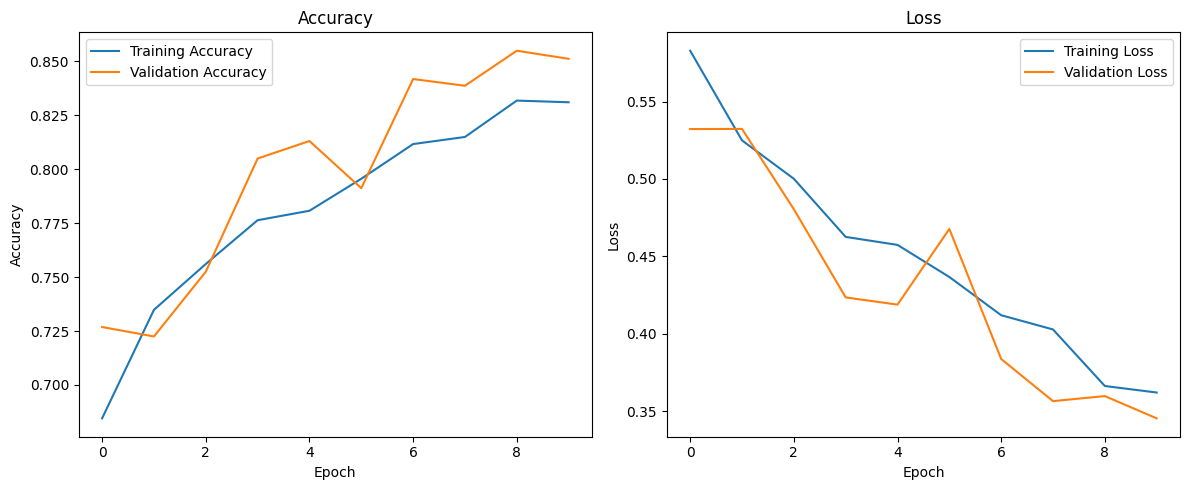

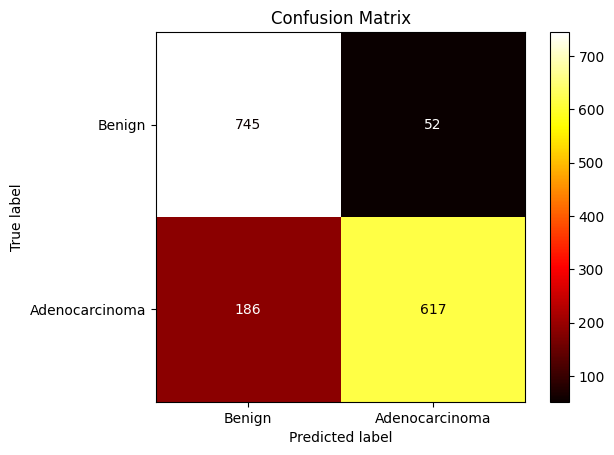


Fold 3/5
Epoch 1 - Train Acc: 0.7022, Val Acc: 0.7031, Train Loss: 0.5697, Val Loss: 0.5535
Epoch 2 - Train Acc: 0.7455, Val Acc: 0.7656, Train Loss: 0.5182, Val Loss: 0.4882
Epoch 3 - Train Acc: 0.7594, Val Acc: 0.7731, Train Loss: 0.4942, Val Loss: 0.4565
Epoch 4 - Train Acc: 0.7795, Val Acc: 0.8031, Train Loss: 0.4632, Val Loss: 0.4339
Epoch 5 - Train Acc: 0.7920, Val Acc: 0.8163, Train Loss: 0.4465, Val Loss: 0.4231
Epoch 6 - Train Acc: 0.8080, Val Acc: 0.7887, Train Loss: 0.4204, Val Loss: 0.4224
Epoch 7 - Train Acc: 0.8144, Val Acc: 0.8462, Train Loss: 0.4032, Val Loss: 0.3786
Epoch 8 - Train Acc: 0.8187, Val Acc: 0.8281, Train Loss: 0.3946, Val Loss: 0.4059
Epoch 9 - Train Acc: 0.7998, Val Acc: 0.8413, Train Loss: 0.4081, Val Loss: 0.3633
Epoch 10 - Train Acc: 0.8094, Val Acc: 0.7619, Train Loss: 0.3943, Val Loss: 0.4553
Fold 3 Results - Accuracy: 0.7619, F1 Score: 0.7040


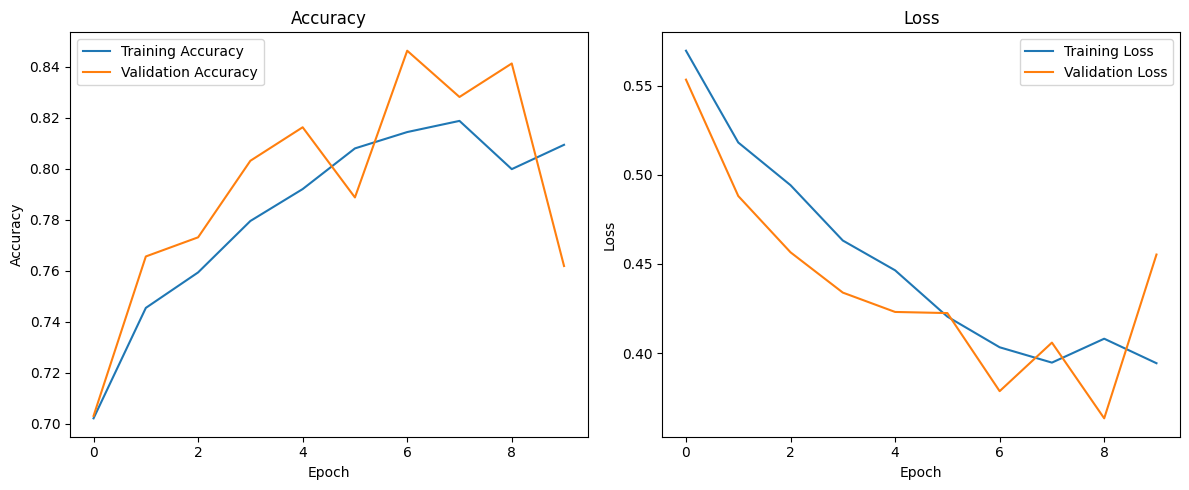

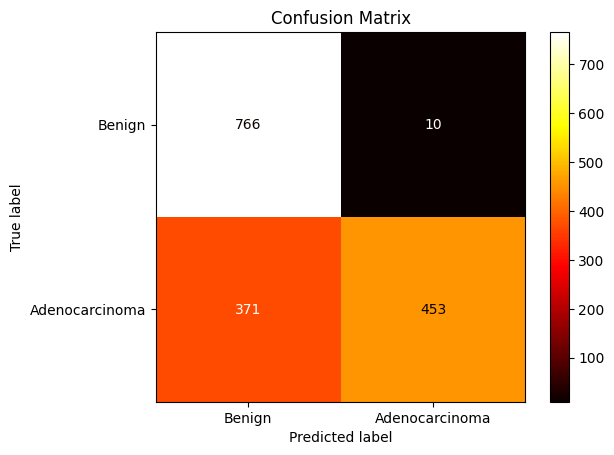


Fold 4/5
Epoch 1 - Train Acc: 0.6925, Val Acc: 0.7087, Train Loss: 0.5789, Val Loss: 0.5535
Epoch 2 - Train Acc: 0.7362, Val Acc: 0.7750, Train Loss: 0.5249, Val Loss: 0.4624
Epoch 3 - Train Acc: 0.7612, Val Acc: 0.7725, Train Loss: 0.4939, Val Loss: 0.4626
Epoch 4 - Train Acc: 0.7773, Val Acc: 0.8100, Train Loss: 0.4719, Val Loss: 0.4095
Epoch 5 - Train Acc: 0.7881, Val Acc: 0.7900, Train Loss: 0.4480, Val Loss: 0.4436
Epoch 6 - Train Acc: 0.8067, Val Acc: 0.8263, Train Loss: 0.4240, Val Loss: 0.3810
Epoch 7 - Train Acc: 0.8063, Val Acc: 0.8344, Train Loss: 0.4175, Val Loss: 0.3626
Epoch 8 - Train Acc: 0.8213, Val Acc: 0.8531, Train Loss: 0.3829, Val Loss: 0.3346
Epoch 9 - Train Acc: 0.8328, Val Acc: 0.8631, Train Loss: 0.3636, Val Loss: 0.3154
Epoch 10 - Train Acc: 0.8411, Val Acc: 0.8825, Train Loss: 0.3487, Val Loss: 0.2894
Fold 4 Results - Accuracy: 0.8825, F1 Score: 0.8725


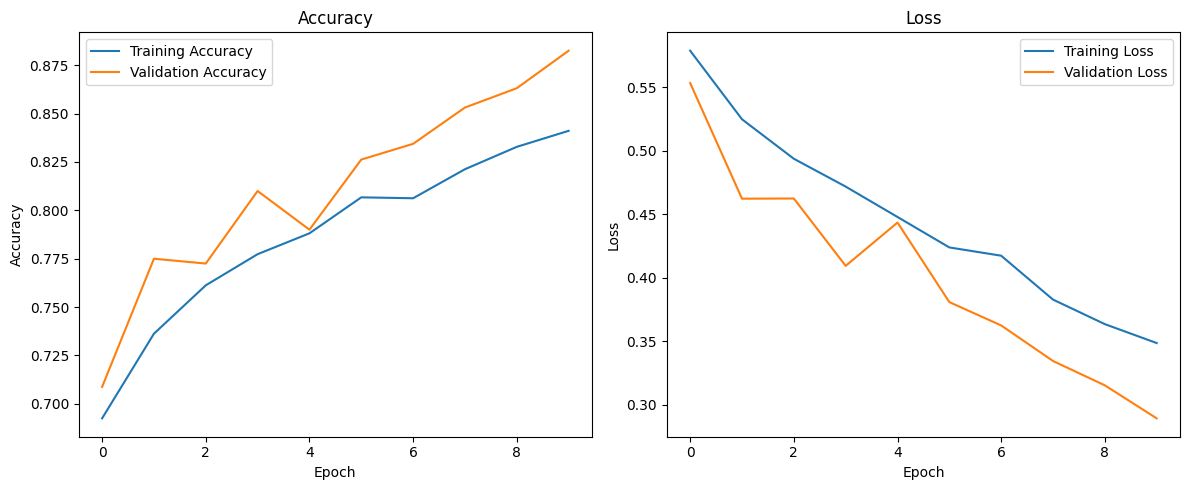

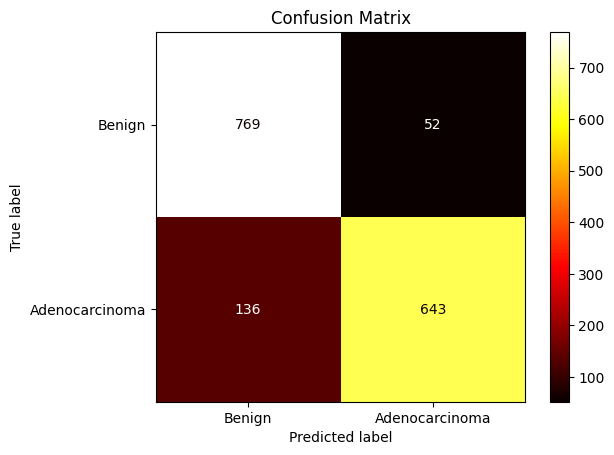


Fold 5/5
Epoch 1 - Train Acc: 0.6937, Val Acc: 0.7662, Train Loss: 0.5739, Val Loss: 0.5145
Epoch 2 - Train Acc: 0.7284, Val Acc: 0.7738, Train Loss: 0.5278, Val Loss: 0.4909
Epoch 3 - Train Acc: 0.7589, Val Acc: 0.7706, Train Loss: 0.5008, Val Loss: 0.4700
Epoch 4 - Train Acc: 0.7733, Val Acc: 0.7963, Train Loss: 0.4679, Val Loss: 0.4315
Epoch 5 - Train Acc: 0.7875, Val Acc: 0.7987, Train Loss: 0.4463, Val Loss: 0.4246
Epoch 6 - Train Acc: 0.8031, Val Acc: 0.8263, Train Loss: 0.4223, Val Loss: 0.3886
Epoch 7 - Train Acc: 0.8050, Val Acc: 0.8319, Train Loss: 0.4108, Val Loss: 0.3734
Epoch 8 - Train Acc: 0.8181, Val Acc: 0.8369, Train Loss: 0.3839, Val Loss: 0.3704
Epoch 9 - Train Acc: 0.8252, Val Acc: 0.8575, Train Loss: 0.3658, Val Loss: 0.3302
Epoch 10 - Train Acc: 0.8050, Val Acc: 0.8225, Train Loss: 0.3845, Val Loss: 0.4006
Fold 5 Results - Accuracy: 0.8225, F1 Score: 0.8431


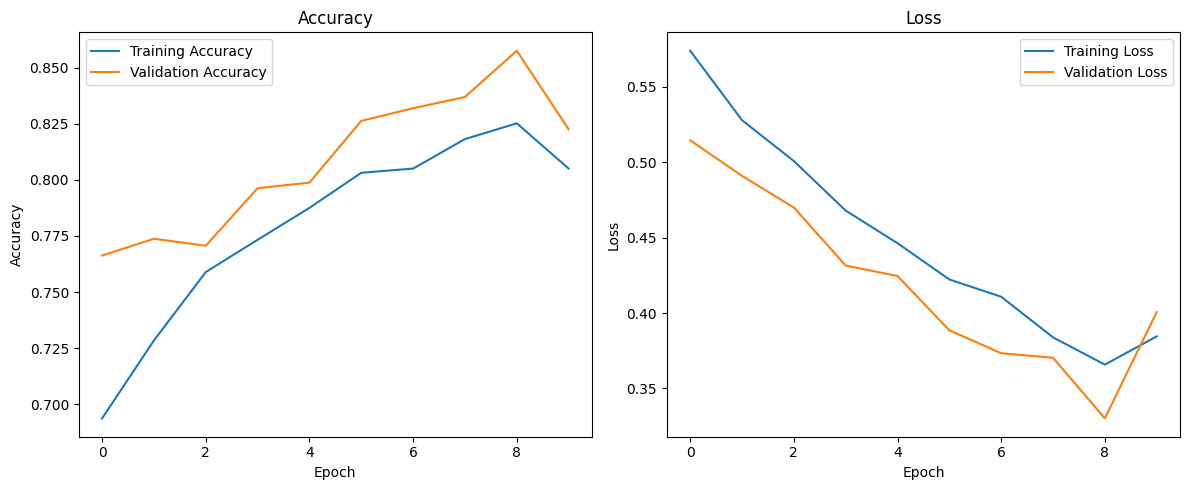

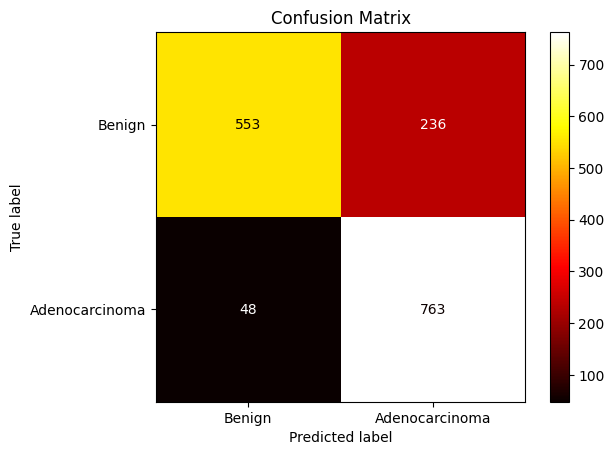


Final Results - Mean Accuracy: 0.8351 ± 0.0413, Mean F1 Score: 0.8235 ± 0.0610


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from kymatio.torch import Scattering2D
from torchsummary import summary

# ScatNet Model 
class ScatNetModel(nn.Module):
    def __init__(self, input_shape=(1, 128, 128)):
        super(ScatNetModel, self).__init__()
        self.scattering = Scattering2D(J=2, shape=input_shape[1:])
        with torch.no_grad():
            dt_input = torch.zeros(1, *input_shape)
            scatter_out = self.scattering(dt_input)
            self._to_linear = scatter_out.view(1, -1).shape[1]
        
        # Classifier (same as CNN model)
        self.classifier = nn.Sequential(
            nn.Linear(self._to_linear, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.scattering(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# Plotting functions
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.hot)
    plt.title("Confusion Matrix")
    plt.show()

def plot_metrics(train_acc, val_acc, train_loss, val_loss):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Prepare data 
X_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)  # NHWC to NCHW
y_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

# K foldCross validation
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
f1_scores = []

device = torch.device('cpu')

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor)):
    print(f"\nFold {fold + 1}/{k}")
    model = ScatNetModel(input_shape=(1, 128, 128)).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()

    X_train_fold, y_train_fold = X_tensor[train_idx], y_tensor[train_idx]
    X_val_fold, y_val_fold = X_tensor[val_idx], y_tensor[val_idx]

    train_loader = DataLoader(TensorDataset(X_train_fold, y_train_fold), batch_size=32, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val_fold, y_val_fold), batch_size=32)

    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0

    train_acc_list, val_acc_list = [], []
    train_loss_list, val_loss_list = [], []

    for epoch in range(10): 
        model.train()
        train_loss, correct, total = 0, 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)
            preds = (outputs > 0.5).float()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

        train_loss /= total
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss, correct, total = 0, 0, 0
        y_preds, y_trues = [], []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                preds = (outputs > 0.5).float()
                correct += (preds == y_batch).sum().item()
                total += y_batch.size(0)
                y_preds.extend(preds.cpu().numpy())
                y_trues.extend(y_batch.cpu().numpy())

        val_loss /= total
        val_acc = correct / total
        

        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    # Load best model and evaluate
    model.load_state_dict(best_model)
    y_preds_bin = np.array(y_preds).astype(int)
    y_trues_bin = np.array(y_trues).astype(int)

    acc = accuracy_score(y_trues_bin, y_preds_bin)
    f1 = f1_score(y_trues_bin, y_preds_bin)
    print(f"Fold {fold+1} Results - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    
    accuracies.append(acc)
    f1_scores.append(f1)
    
    plot_metrics(train_acc_list, val_acc_list, train_loss_list, val_loss_list)
    plot_confusion_matrix(y_trues_bin, y_preds_bin, class_names=['Benign', 'Adenocarcinoma'])

print(f"\nFinal Results - Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}, Mean F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

In [27]:
torch.save(model.state_dict(), "scatnet_model.pth")
print("Saved last trained model as 'scatnet_model.pth'")

Saved last trained model as 'scatnet_model.pth'


Filter Extraction

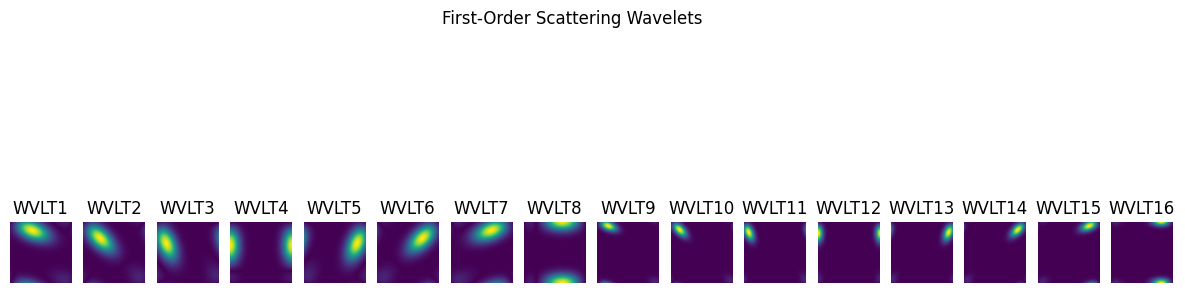

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from kymatio.scattering2d.filter_bank import filter_bank
J = 2  #  scales
shape = (128, 128)  # Input shape
L = 8  
filters = filter_bank(M=shape[0], N=shape[1], J=J, L=L)
# Extract filters
first_order_wavelets = [wavelet['levels'][0] for wavelet in filters['psi']]
# Plot the filters
fig, axes = plt.subplots(1, len(first_order_wavelets), figsize=(15, 5))
for i, wavelet in enumerate(first_order_wavelets):
    ax = axes[i]
    ax.imshow(np.abs(wavelet), cmap='viridis')
    ax.set_title(f'WVLT{i+1}')
    ax.axis('off')

plt.suptitle('First-Order Scattering Wavelets')
plt.show()



Deep LIFT SHAP and OCCLusion Implimentation - With Captum Library

In [74]:
!pip install captum


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.2 MB/s eta 0:00:00


Deep Lift SHAP and Occlussion Implimentation For ScatNet - Captum Library

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import DeepLiftShap, Occlusion
from kymatio.torch import Scattering2D

# ScatNet Model in PyTorch
class ScatNetTorch(nn.Module):
    def __init__(self, input_shape):
        super(ScatNetTorch, self).__init__()
        self.scattering = Scattering2D(J=2, shape=(input_shape[1], input_shape[2]))

        # output shape
        with torch.no_grad():
            dt_input = torch.zeros(1, *input_shape)  # Shape: (1, 1, 128, 128)
            scatter_out = self.scattering(dt_input)  # Apply scattering
            self.feature_size = scatter_out.numel() // scatter_out.shape[0]  # Flatten size per sample

        # classifier
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.scattering(x)  
        x = x.view(x.shape[0], -1)  
        return self.classifier(x)

# Instantiate ScatNet Model
input_shape = (1, 128, 128)
scatnet_torch_model = ScatNetTorch(input_shape)
scatnet_torch_model.eval()


ScatNetTorch(
  (scattering): Scattering2D()
  (classifier): Sequential(
    (0): Linear(in_features=82944, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [ ]:
#  TensorFlow data to PyTorch tensor
def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()


input_tensor = X_test[:1]  # Select first test image
input_tensor_torch = tf_to_torch(input_tensor)
input_tensor_torch.requires_grad_()

# Create multiple baseline for SHAP
num_baselines = 5
reference_input = np.zeros((num_baselines, 128, 128, 1), dtype=np.float32)
reference_input_torch = tf_to_torch(reference_input)

f:\university\visual\venv\lib\site-packages\captum\log\dummy_log.py:39: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  return func(*args, **kwargs)


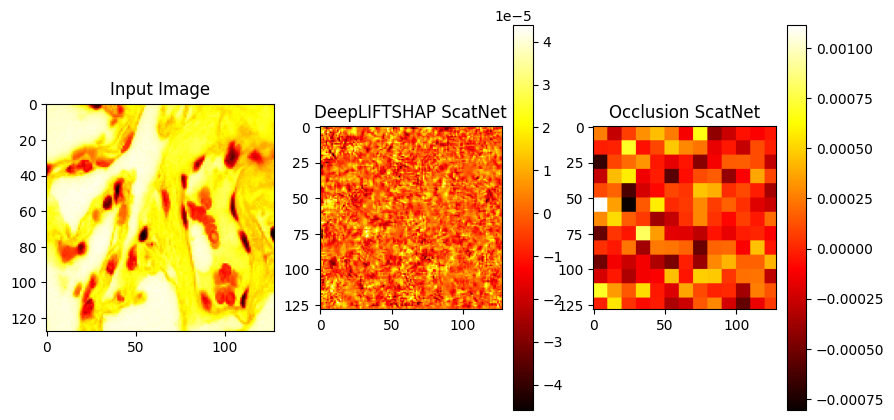

In [ ]:
# Apply DeepLIFT
deep_lift = DeepLiftShap(scatnet_torch_model)
deep_lift_shap_scatnet_captum = deep_lift.attribute(input_tensor_torch, baselines=reference_input_torch).squeeze().detach().numpy()

# Apply Occlusion
occlusion = Occlusion(scatnet_torch_model)
occlusion_scatnet_captum = occlusion.attribute(input_tensor_torch, strides=(1, 10, 10), sliding_window_shapes=(1, 10, 10)).squeeze().detach().numpy()
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_tensor[0, :, :, 0], cmap='hot')
plt.subplot(1, 3, 2)
plt.title("DeepLIFTSHAP ScatNet")
plt.imshow(deep_lift_shap_scatnet_captum.reshape(128, 128), cmap='hot')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Occlusion ScatNet")
plt.imshow(occlusion_scatnet_captum.reshape(128, 128), cmap='hot')
plt.colorbar()
plt.show()


DeepLIFT SHAP and Occlusion  Implimentation CNN - Captum Library

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import DeepLiftShap, Occlusion

# CNN Model in PyTorch
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Conv Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)  
        self.pool1 = nn.MaxPool2d(2)                 
        self.drop1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)  
        self.pool2 = nn.MaxPool2d(2)                   
        self.drop2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)  
        self.pool3 = nn.MaxPool2d(2)                    
        self.drop3 = nn.Dropout(0.25)

        # Dynamically calculate flattened size
        self._to_linear = None
        self._get_flattened_size()

        # FC Layers
        self.fc1 = nn.Linear(self._to_linear, 128)
        self.drop_fc = nn.Dropout(0.5)
        self.out = nn.Linear(128, 1)

    def _get_flattened_size(self):
        with torch.no_grad():
            sample = torch.zeros(1, 1, 128, 128)
            x = F.relu(self.conv1(sample))
            x = self.pool1(x)
            x = self.drop1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = self.drop2(x)
            x = F.relu(self.conv3(x))
            x = self.pool3(x)
            x = self.drop3(x)
            self._to_linear = x.view(1, -1).shape[1]

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.drop1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.drop2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = self.drop3(x)
        x = x.reshape(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.drop_fc(x)
        return torch.sigmoid(self.out(x))
# Instantiate CNN Model
cnn_torch_model = CNNModel()
cnn_torch_model.eval()


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=25088, out_features=128, bias=True)
  (drop_fc): Dropout(p=0.5, inplace=False)
  (out): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()


input_tensor = X_test[:1]  
input_tensor_torch = tf_to_torch(input_tensor)
input_tensor_torch.requires_grad_()  

# multiple baseline for SHAP)
reference_input = np.zeros((5, 128, 128, 1), dtype=np.float32)
reference_input_torch = tf_to_torch(reference_input)
deep_lift = DeepLiftShap(cnn_torch_model)
deep_lift_shap_cnn_captum = deep_lift.attribute(input_tensor_torch, reference_input_torch).squeeze().detach().numpy()
occlusion = Occlusion(cnn_torch_model)
occlusion_cnn_captum = occlusion.attribute(input_tensor_torch, strides=(1, 10, 10), sliding_window_shapes=(1, 10, 10)).squeeze().detach().numpy()



f:\university\visual\venv\lib\site-packages\captum\log\dummy_log.py:39: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  return func(*args, **kwargs)


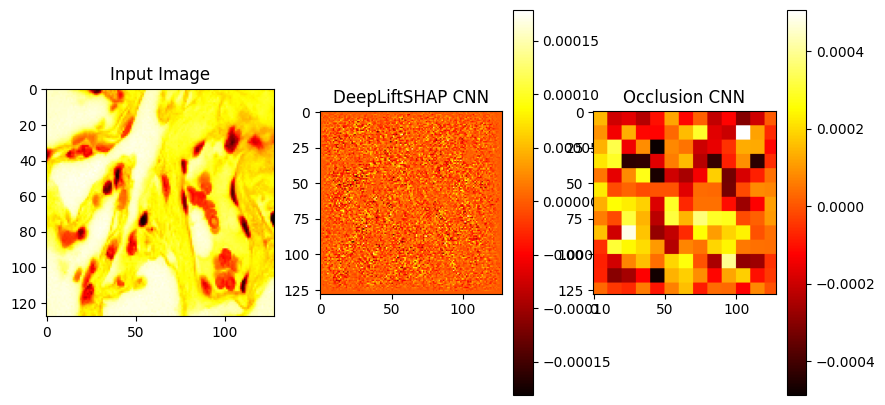

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_tensor[0, :, :, 0], cmap='hot')
plt.subplot(1, 3, 2)
plt.title("DeepLiftSHAP CNN")
plt.imshow(deep_lift_shap_cnn_captum.reshape(128, 128), cmap='hot')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Occlusion CNN")
plt.imshow(occlusion_cnn_captum.reshape(128, 128), cmap='hot')
plt.colorbar()
plt.show()

Deep Lift SHAP and Occlusion For ScatNet Model - Manual Implimentation

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from kymatio.torch import Scattering2D

class ScatNetTorch(nn.Module):
    def __init__(self, input_shape):
        super(ScatNetTorch, self).__init__()
        self.scattering = Scattering2D(J=2, shape=(input_shape[1], input_shape[2]))

        # output shape
        with torch.no_grad():
            dt_input = torch.zeros(1, *input_shape)
            scatter_out = self.scattering(dt_input)
            self.feature_size = scatter_out.numel() // scatter_out.shape[0]

        # classifier
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.scattering(x)
        x = x.view(x.shape[0], -1)
        return self.classifier(x)

input_shape = (1, 128, 128)
scatnet_torch_model = ScatNetTorch(input_shape)
scatnet_torch_model.eval()

ScatNetTorch(
  (scattering): Scattering2D()
  (classifier): Sequential(
    (0): Linear(in_features=82944, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [ ]:
def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()


input_tensor = X_test[:1]  
input_tensor_torch = tf_to_torch(input_tensor)
input_tensor_torch.requires_grad_()

# Create a baseline for Shap
num_baselines = 5
reference_input = np.zeros((num_baselines, 128, 128, 1), dtype=np.float32)
reference_input_torch = tf_to_torch(reference_input)



def manual_deeplift_shap(model, input_tensor, baseline_tensor_batch):
    model.eval()
    input_tensor = input_tensor.clone().detach().requires_grad_(True)
    
    all_attributions = []

    for i in range(baseline_tensor_batch.shape[0]):
        baseline = baseline_tensor_batch[i:i+1].clone().detach().requires_grad_(True)

        # Forward pass
        output_input = model(input_tensor)
        output_baseline = model(baseline)

        # Backward for input
        model.zero_grad()
        output_input.backward(torch.ones_like(output_input), retain_graph=True)
        grads_input = input_tensor.grad.clone()

        # Backward for baseline
        input_tensor.grad.zero_()  # Clear previous grad
        model.zero_grad()
        output_baseline.backward(torch.ones_like(output_baseline))
        grads_baseline = baseline.grad.clone()

        # Attribution: (input - baseline) * (grad_input - grad_baseline)
        attr = (input_tensor - baseline) * (grads_input - grads_baseline)
        all_attributions.append(attr.detach())

    # Average over baselines
    shap_attr = torch.mean(torch.stack(all_attributions), dim=0)
    return shap_attr.squeeze().numpy()


def manual_occlusion(model, input_tensor, window_size=(1,10,10), stride=(1,10,10)):
    input_clone = input_tensor.clone()
    baseline_value = 0.0
    _, c, h, w = input_tensor.shape
    output_original = model(input_tensor).item()
    occlusion_map = np.zeros((h, w), dtype=np.float32)

    for i in range(0, h, stride[1]):
        for j in range(0, w, stride[2]):
            input_occluded = input_clone.clone()
            i_end = min(i + window_size[1], h)
            j_end = min(j + window_size[2], w)
            input_occluded[:, :, i:i_end, j:j_end] = baseline_value
            with torch.no_grad():
                output = model(input_occluded).item()
            occlusion_map[i:i_end, j:j_end] += output_original - output

    return occlusion_map


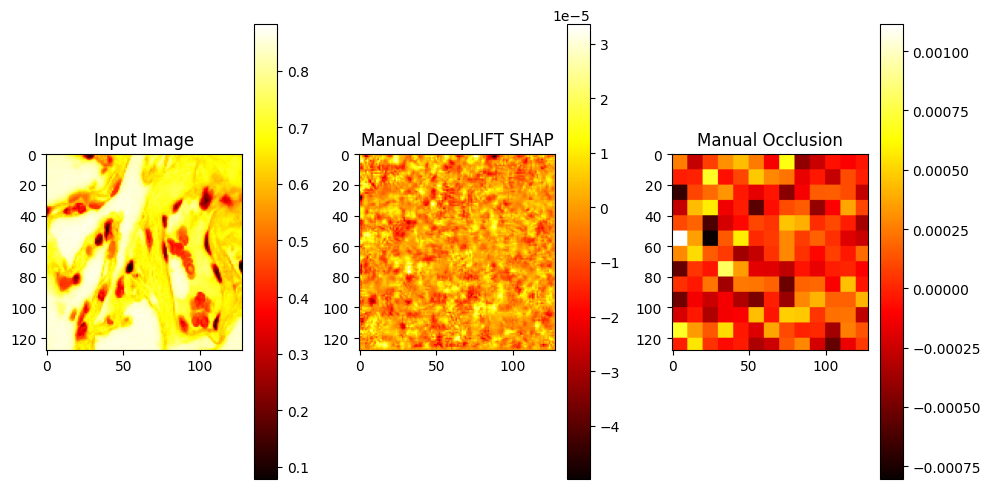

In [ ]:
deep_lift_shap_scatnet_manual = manual_deeplift_shap(scatnet_torch_model, input_tensor_torch, reference_input_torch)

occlussion_scatnet_manual = manual_occlusion(scatnet_torch_model, input_tensor_torch)


plt.figure(figsize=(10, 5))

# Input Image 
input_img_np = input_tensor_torch.squeeze().detach().cpu().numpy()
if input_img_np.ndim == 3:
    input_img_np = input_img_np[0]  

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_img_np, cmap='hot')
plt.colorbar()

# DeepLIFT SHAP Result
plt.subplot(1, 3, 2)
plt.title("Manual DeepLIFT SHAP")
plt.imshow(deep_lift_shap_scatnet_manual.reshape(128, 128), cmap='hot')
plt.colorbar()

# Occlusion Result
plt.subplot(1, 3, 3)
plt.title("Manual Occlusion")
plt.imshow(occlussion_scatnet_manual, cmap='hot')
plt.colorbar()

plt.tight_layout()
plt.show()


Deep LIFT SHAP and Occlussion for CNN Model - Manual Implimentation

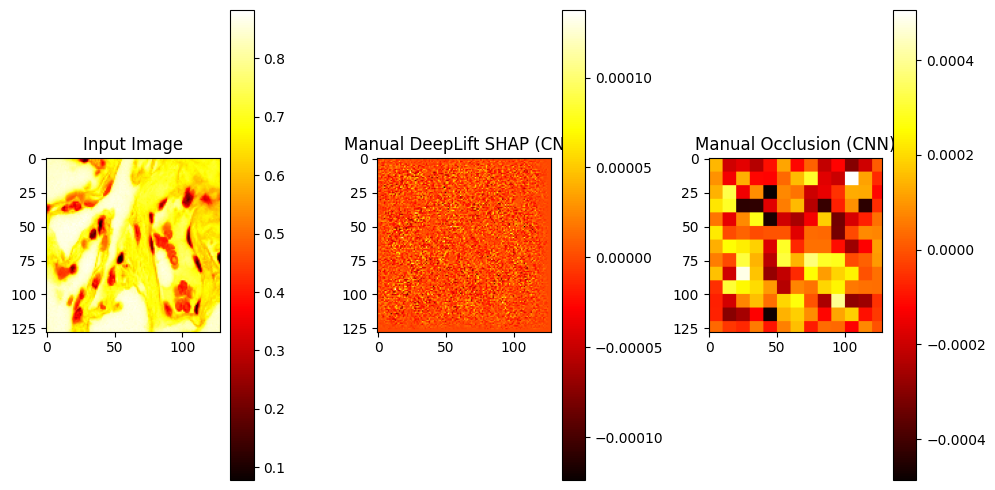

In [ ]:
import torch.nn.functional as F

#Manual DeepLIFT SHAP 
def manual_deeplift_shap(model, input_tensor, baseline_tensor_batch):
    model.eval()
    input_tensor = input_tensor.clone().detach().requires_grad_(True)
    
    all_attributions = []

    for i in range(baseline_tensor_batch.shape[0]):
        baseline = baseline_tensor_batch[i:i+1].clone().detach().requires_grad_(True)

        # Forward pass
        output_input = model(input_tensor)
        output_baseline = model(baseline)

        # Backward for input
        model.zero_grad()
        output_input.backward(torch.ones_like(output_input), retain_graph=True)
        grads_input = input_tensor.grad.clone()

        # Backward for baseline
        input_tensor.grad.zero_()  # Clear previous grad
        model.zero_grad()
        output_baseline.backward(torch.ones_like(output_baseline))
        grads_baseline = baseline.grad.clone()

        # Attribution: (input - baseline) * (grad_input - grad_baseline)
        attr = (input_tensor - baseline) * (grads_input - grads_baseline)
        all_attributions.append(attr.detach())

    # Average over baselines
    shap_attr = torch.mean(torch.stack(all_attributions), dim=0)
    return shap_attr.squeeze().numpy()

def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()


input_tensor = X_test[:1]  
input_tensor_torch = tf_to_torch(input_tensor)
input_tensor_torch.requires_grad_()

# Create a baseline
num_baselines = 5
reference_input = np.zeros((num_baselines, 128, 128, 1), dtype=np.float32)
reference_input_torch = tf_to_torch(reference_input)


deep_lift_shap_cnn_manual = manual_deeplift_shap(cnn_torch_model, input_tensor_torch, reference_input_torch)


def manual_occlusion(model, input_tensor, window_size=10, stride=10, baseline_value=0.0):
    input_clone = input_tensor.clone()
    _, c, h, w = input_clone.shape
    attribution = torch.zeros_like(input_clone)

    for i in range(0, h, stride):
        for j in range(0, w, stride):
            # Create a copy of the input with occluded patch
            occluded = input_clone.clone()
            occluded[:, :, i:i+window_size, j:j+window_size] = baseline_value

            # Get difference in output
            output_orig = model(input_clone).item()
            output_occ = model(occluded).item()
            delta = output_orig - output_occ

            # Assign attribution score to the occluded region
            attribution[:, :, i:i+window_size, j:j+window_size] += delta

    return attribution.squeeze().detach().cpu().numpy()

manual_occ_attr_CNN = manual_occlusion(cnn_torch_model, input_tensor_torch, window_size=10, stride=10)


plt.figure(figsize=(10, 5))

# Input image
input_img_np = input_tensor_torch.squeeze().detach().cpu().numpy()
if input_img_np.ndim == 3:
    input_img_np = input_img_np[0]  # Take only the first channel if needed

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_img_np, cmap='hot')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Manual DeepLift SHAP (CNN)")
plt.imshow(deep_lift_shap_cnn_manual.reshape(128, 128), cmap='hot')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Manual Occlusion (CNN)")
plt.imshow(manual_occ_attr_CNN.reshape(128, 128), cmap='hot')
plt.colorbar()

plt.tight_layout()
plt.show()



CNN Deep LIFT SHAP and Occlusion Comparison

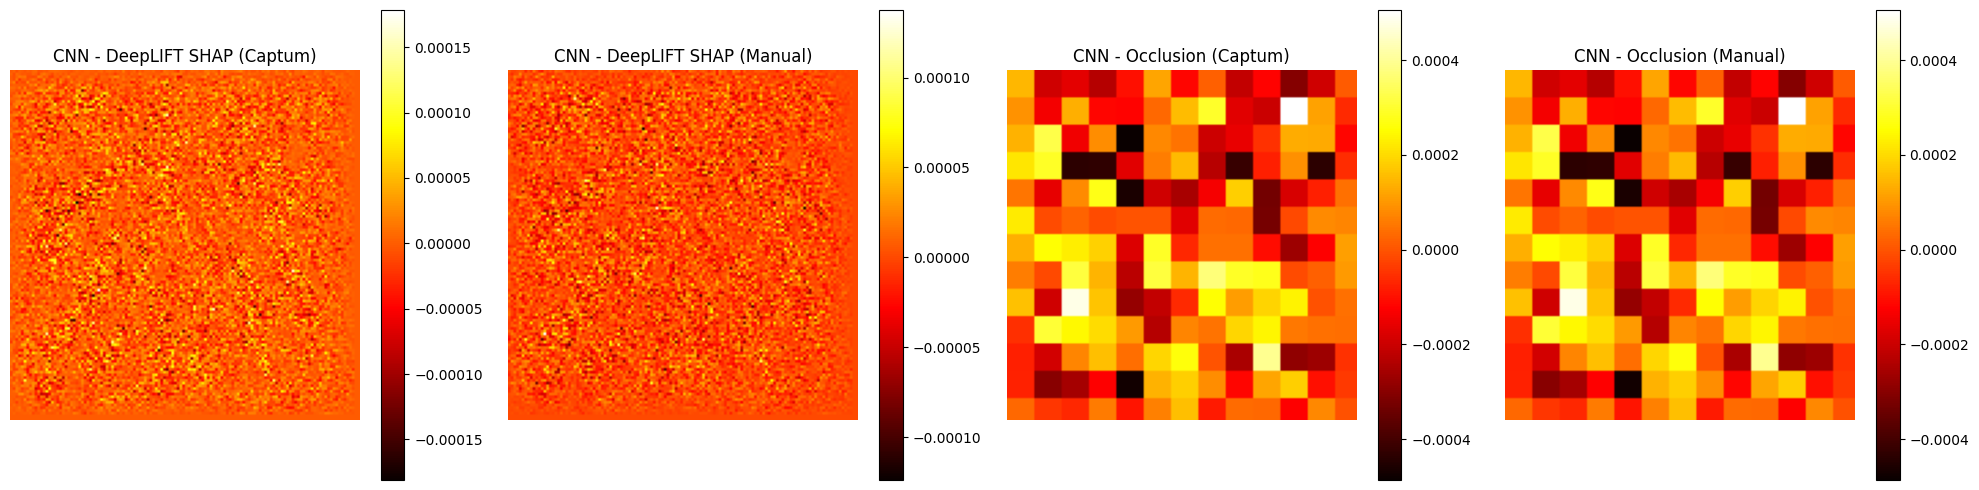

In [ ]:
import matplotlib.pyplot as plt

# Ensure attribution shape is correct
def preprocess_attr(attr):
    if isinstance(attr, torch.Tensor):
        attr = attr.detach().cpu().numpy()
    if len(attr.shape) == 4:  
        return attr.squeeze(0).squeeze(0)
    elif len(attr.shape) == 3:  
        return attr.squeeze(0)
    return attr

# Preprocess all attribution maps
attributions = [
    preprocess_attr(deep_lift_shap_cnn_captum),
    preprocess_attr(deep_lift_shap_cnn_manual),  
    preprocess_attr(occlusion_cnn_captum),   
    preprocess_attr(manual_occ_attr_CNN)  
]

# Titles
titles = [
    "CNN - DeepLIFT SHAP (Captum)",
    "CNN - DeepLIFT SHAP (Manual)",
    "CNN - Occlusion (Captum)",
    "CNN - Occlusion (Manual)"
]

# Plot comparison
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    img = ax.imshow(attributions[i], cmap='hot')
    ax.set_title(titles[i])
    ax.axis("off")
    fig.colorbar(img, ax=ax)

plt.tight_layout()
plt.show()


Deep LIFT SHAP and Occlusion Comparison Manual VS Captum

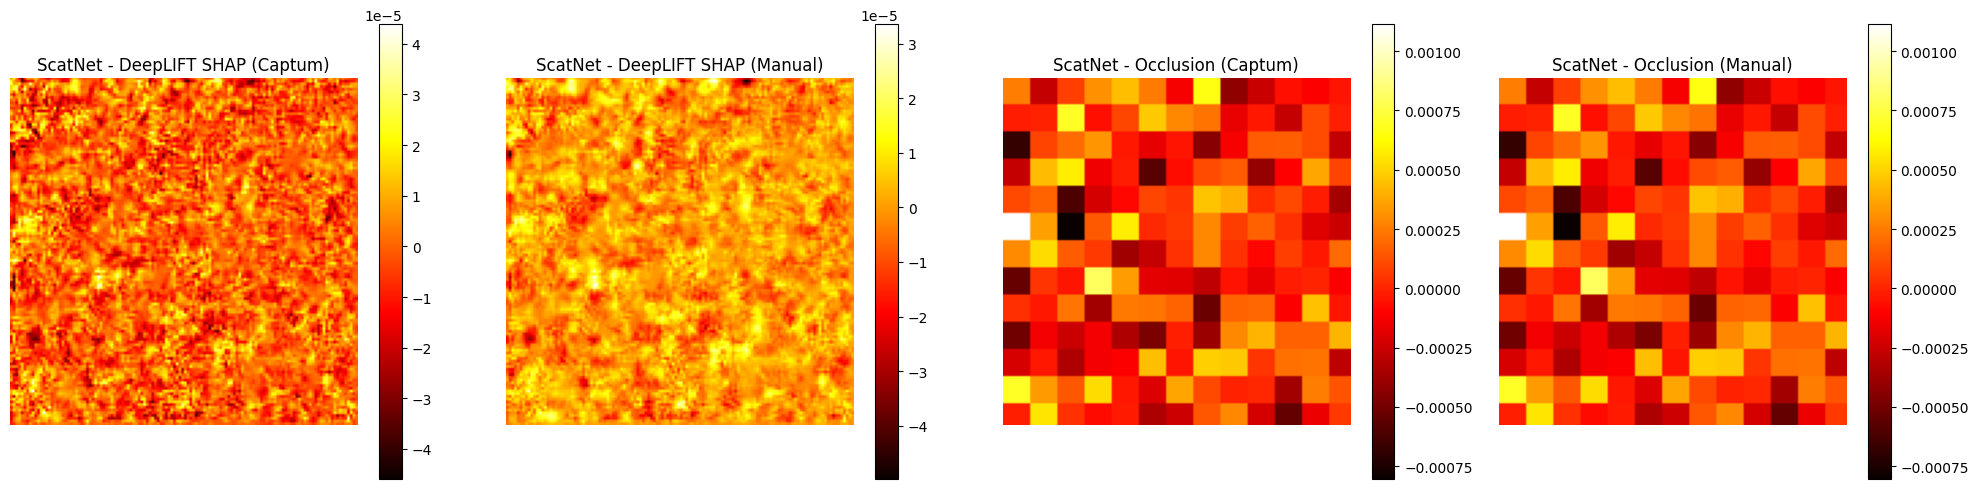

In [ ]:
import matplotlib.pyplot as plt

def preprocess_attr(attr):
    if isinstance(attr, torch.Tensor):
        attr = attr.detach().cpu().numpy()
    if len(attr.shape) == 4:
        return attr.squeeze(0).squeeze(0)
    elif len(attr.shape) == 3:
        return attr.squeeze(0)
    return attr

attributions_scatnet = [
    preprocess_attr(deep_lift_shap_scatnet_captum),        
    preprocess_attr(deep_lift_shap_scatnet_manual),  
    preprocess_attr(occlusion_scatnet_captum),         
    preprocess_attr(occlussion_scatnet_manual)   
]

titles_scatnet = [
    "ScatNet - DeepLIFT SHAP (Captum)",
    "ScatNet - DeepLIFT SHAP (Manual)",
    "ScatNet - Occlusion (Captum)",
    "ScatNet - Occlusion (Manual)"
]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axes.flat):
    img = ax.imshow(attributions_scatnet[i], cmap='hot')
    ax.set_title(titles_scatnet[i])
    ax.axis("off")
    fig.colorbar(img, ax=ax)

plt.tight_layout()
plt.show()
